## Big Data Mart Sales Problem

#### Problem Statement:

BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose.

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model.

#### Importing the required libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset:

In [3]:
# Loading train dataset

df_train=pd.read_csv('bigdatamart_Train.csv')

df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Loading the test dataset

df_test=pd.read_csv('bigdatamart_test.csv')

df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


#### Checking for the shape of the train dataset:

In [6]:
df_train.shape

(8523, 12)

- The train dataset contains 8523 rows and 12 columns.

#### Checking for the shape of the test dataset:

In [6]:
df_test.shape

(5681, 11)

- The test dataset contains 5681 rows and 11 columns.

#### Checking for the null values in the train dataset:

In [8]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- The train dataset contains missing values (null values) in the following columns:
    - Item_Weight
    - Outlet_Size

#### Checking for the null values in the test dataset:

In [9]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

- The test dataset contains missing values in the following columns:
    - Item_Weight
    - Outlet_size

#### Checking for the information of the train dataset:

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Observations about the train dataset:
  - There are null values in the train dataset as said earlier.
  - 4 columns of the train dataset are of float datatype.
  - 7 columns are of object datatype.
  - 1 column is of integer datatype.

#### Checking for the information of the test dataset:

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Observations of the test dataset:
- There are missing values as said earlier.
- 3 columns are of float datatype.
- 7 columns are of object datatype.
- 1 column is of integere datatype.

#### Plotting heatmap to show the missing values of the train dataset:

<AxesSubplot:>

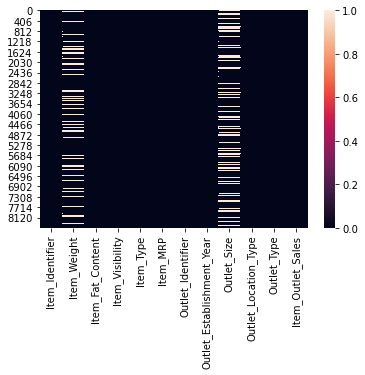

In [11]:
sns.heatmap(df_train.isnull())

By this we can see that their is lots of missing values in two columns . So we will treat it in further steps.

#### Plotting heatmap to show the missing values of  the test dataset:

<AxesSubplot:>

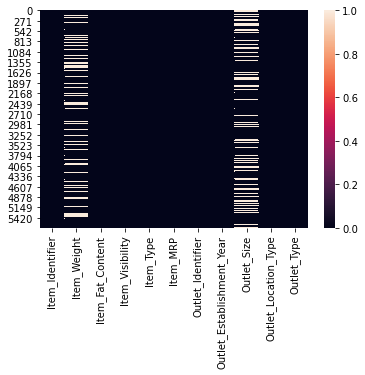

In [10]:
sns.heatmap(df_test.isnull())

In [13]:
# Checking for the categorical and numerical features of the train dataset:

cat_df=df_train.select_dtypes(include="object")
num_df=df_train.select_dtypes(exclude="object")
print(f"There are ",len(cat_df.columns)," number of Categorical Attributes:")
print(f"There are ",len(num_df.columns)," number of Numerical Attributes:")

There are  7  number of Categorical Attributes:
There are  5  number of Numerical Attributes:


#### Removing Null Values:-

In [14]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [15]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [16]:
df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0],inplace=True)

Since it is a Categorical Column We will remove the Null Values by Replacing the null values with mode.

In [17]:
df_test["Outlet_Size"].fillna(df_test["Outlet_Size"].mode()[0],inplace=True)

In [18]:
# Checking for the null values again: (train dataset)
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
# Checking for the null values again. (test dataset)

df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Now the Null Values are Removed so we will do the Exploratory Data Analysis.

# EDA:-

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

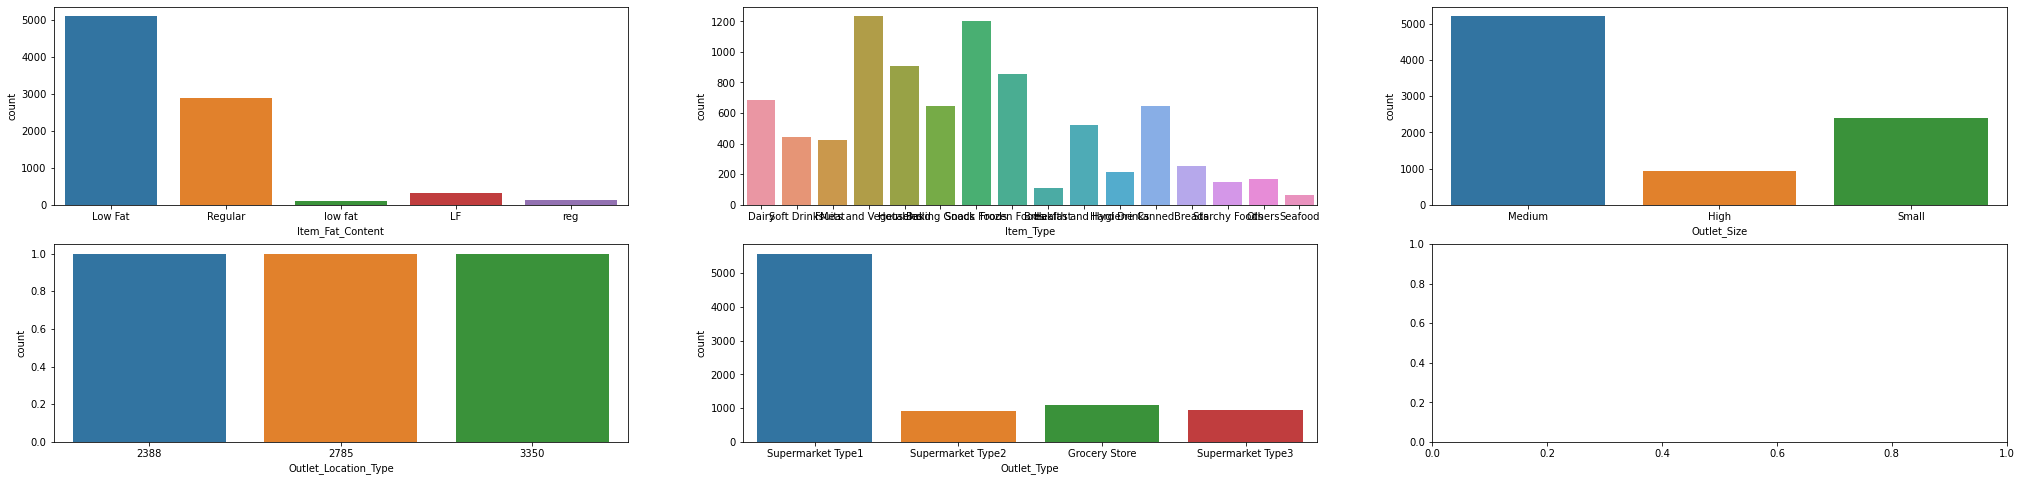

In [20]:
fig,ax=plt.subplots(2,3,figsize=(35,8))
sns.countplot(df_train['Item_Fat_Content'],ax=ax[0,0])
sns.countplot(df_train['Item_Type'],ax=ax[0,1])
sns.countplot(df_train['Outlet_Size'],ax=ax[0,2])
sns.countplot(df_train['Outlet_Location_Type'].value_counts(),ax=ax[1,0])
sns.countplot(df_train['Outlet_Type'],ax=ax[1,1])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

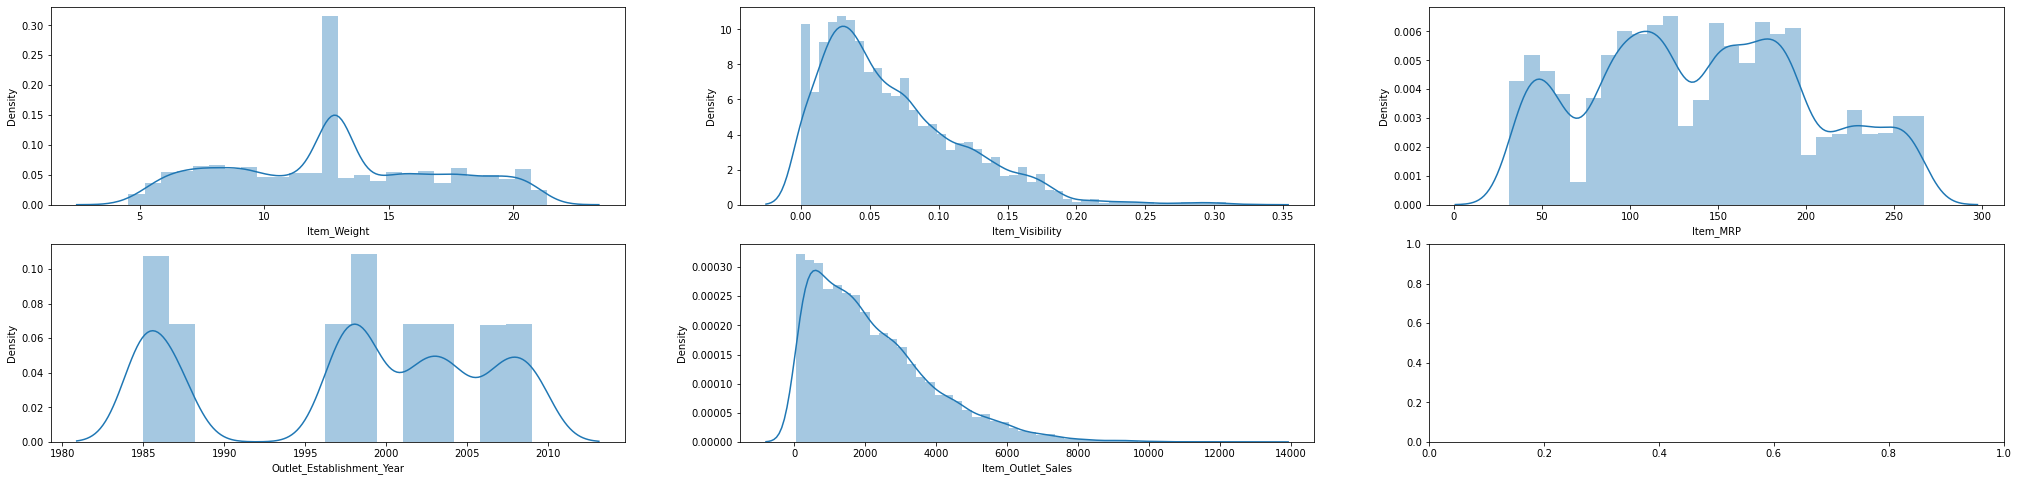

In [21]:
fig,ax=plt.subplots(2,3,figsize=(35,8))
sns.distplot(df_train['Item_Weight'],ax=ax[0,0])
sns.distplot(df_train['Item_Visibility'],ax=ax[0,1])
sns.distplot(df_train['Item_MRP'],ax=ax[0,2])
sns.distplot(df_train['Outlet_Establishment_Year'],ax=ax[1,0])
sns.distplot(df_train['Item_Outlet_Sales'],ax=ax[1,1])

#### Stastical Summary:

In [22]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


We can observe that there is some Outliers in the dataset.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

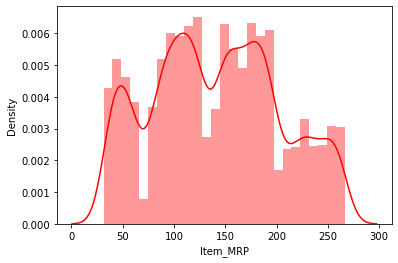

In [26]:
sns.distplot(df_train["Item_MRP"],color='red')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

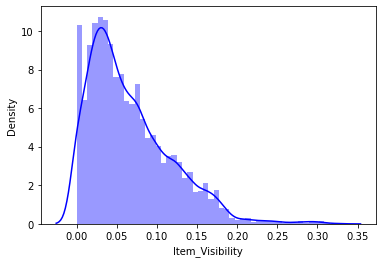

In [25]:
sns.distplot(df_train["Item_Visibility"],color='blue')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

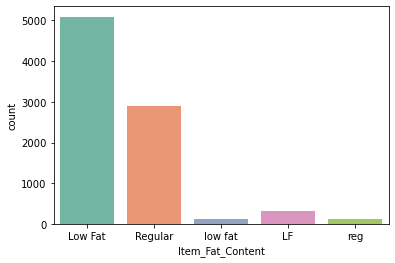

In [27]:
sns.countplot(df_train["Item_Fat_Content"],palette='Set2')

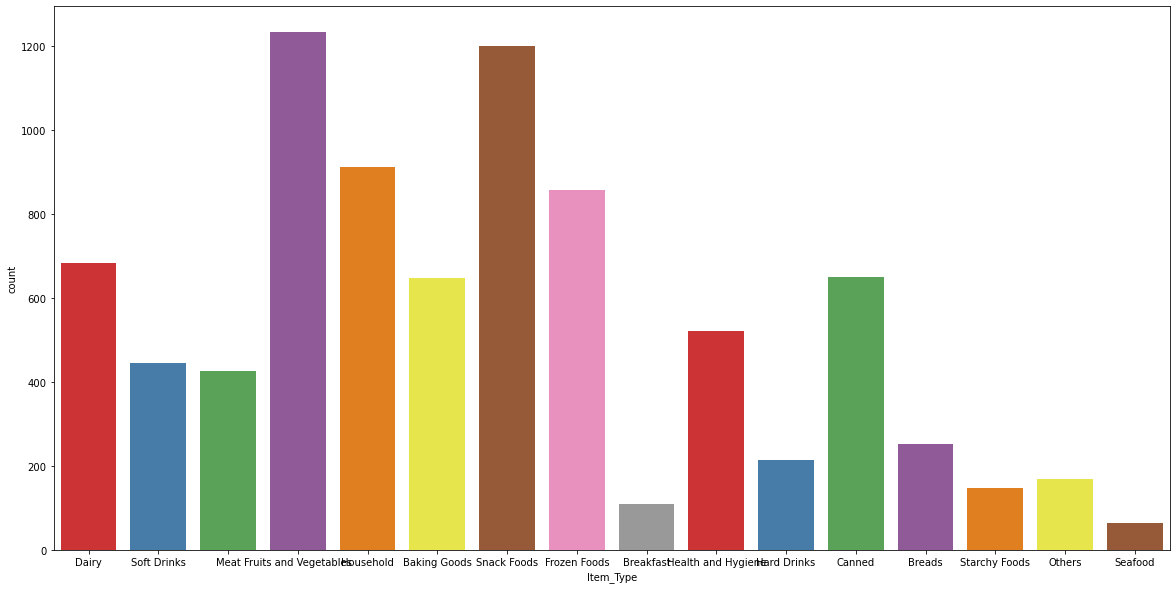

In [29]:
l=list(df_train["Item_Type"].unique())
plt.figure(figsize=[20,10])
chart=sns.countplot(df_train["Item_Type"],palette="Set1")

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

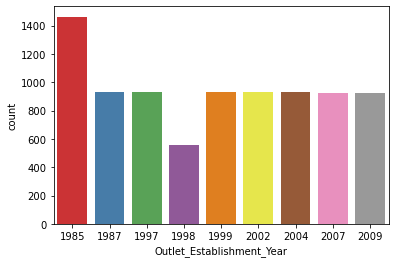

In [30]:
sns.countplot(df_train['Outlet_Establishment_Year'] , palette="Set1")

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

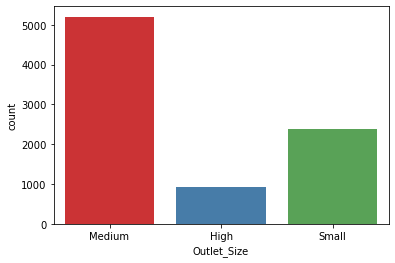

In [31]:
sns.countplot(df_train['Outlet_Size'], palette="Set1")

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

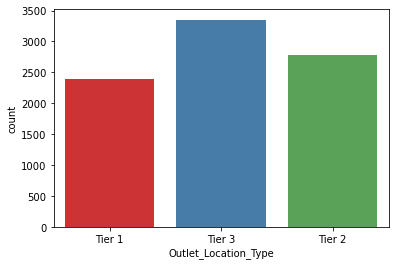

In [32]:
sns.countplot(df_train['Outlet_Location_Type'] , palette="Set1")

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

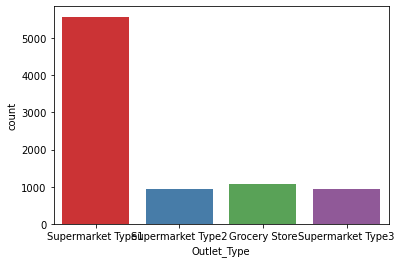

In [33]:
sns.countplot(df_train['Outlet_Type'] , palette = 'Set1')

#### CORRELATION MATRIX:-

In [34]:
corr=df_train.corr()

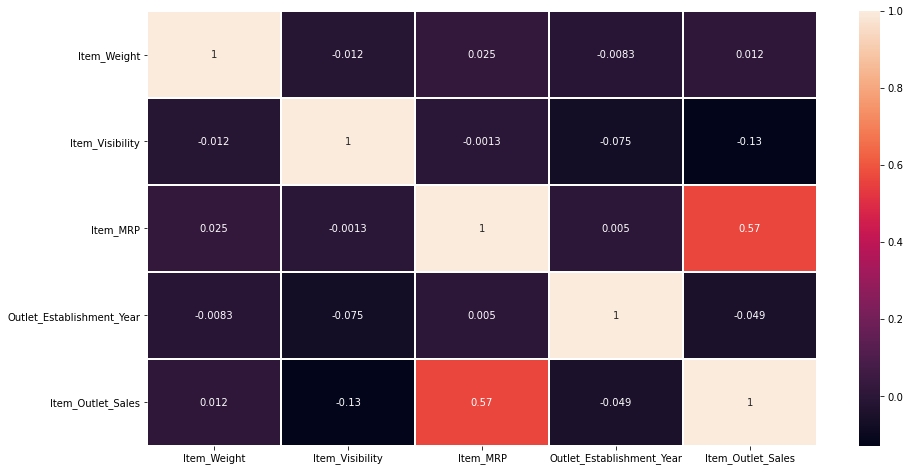

In [36]:
plt.figure(figsize=[15,8])
sns.heatmap(corr,annot=True, linewidths=0.25, linecolor='white')
plt.show()

In [37]:
corr.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.203191,0.156636,0.319207,0.174550,0.280273
std,0.445681,0.474241,0.450920,0.462539,0.486947
min,-0.012049,-0.128625,-0.001315,-0.074834,-0.128625
25%,-0.008301,-0.074834,0.005020,-0.049135,-0.049135
50%,0.011550,-0.012049,0.024756,-0.008301,0.011550
75%,0.024756,-0.001315,0.567574,0.005020,0.567574
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### Treating Categorical Values:-

In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [39]:
df_train.drop('Item_Identifier',axis=1,inplace=True)

In [40]:
df_test.drop('Item_Identifier',axis=1,inplace=True)

In [41]:
print('Values before Imputing numeric values:',df_train['Item_Fat_Content'].unique())
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].apply(lambda x: x.lower())
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].apply(lambda x:'lf' if x=='low fat' else x )
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].apply(lambda x:'reg' if x=='regular' else x )
df_train['Item_Fat_Content']=df_train['Item_Fat_Content'].map({
    'lf':0,
    'reg':1
})
print('Values after Imputing numeric values:',df_train['Item_Fat_Content'].unique())

Values before Imputing numeric values: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Values after Imputing numeric values: [0 1]


In [42]:
print('Values before Imputing numeric values:',df_test['Item_Fat_Content'].unique())
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].apply(lambda x: x.lower())
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].apply(lambda x:'lf' if x=='low fat' else x )
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].apply(lambda x:'reg' if x=='regular' else x )
df_test['Item_Fat_Content']=df_test['Item_Fat_Content'].map({
    'lf':0,
    'reg':1
})
print('Values after Imputing numeric values:',df_test['Item_Fat_Content'].unique())

Values before Imputing numeric values: ['Low Fat' 'reg' 'Regular' 'LF' 'low fat']
Values after Imputing numeric values: [0 1]


In [43]:
print('Values before Imputing numeric values:', df_train['Outlet_Size'].unique())
df_train['Outlet_Size']=df_train['Outlet_Size'].map({ 'Medium':1,                            
                                'High':2,
                                'Small':3
})
print('Values after Imputing numeric values:' ,df_train['Outlet_Size'].unique())

Values before Imputing numeric values: ['Medium' 'High' 'Small']
Values after Imputing numeric values: [1 2 3]


In [44]:
print('Values before Imputing numeric values:', df_test['Outlet_Size'].unique())
df_test['Outlet_Size']=df_test['Outlet_Size'].map({ 'Medium':1,                            
                                'High':2,
                                'Small':3
})
print('Values after Imputing numeric values:' ,df_test['Outlet_Size'].unique())

Values before Imputing numeric values: ['Medium' 'Small' 'High']
Values after Imputing numeric values: [1 3 2]


In [45]:
print('Values before Imputing :'  ,df_train['Outlet_Location_Type'].unique())
df_train['Outlet_Location_Type']=df_train['Outlet_Location_Type'].map({ 'Tier 1':1,
                                'Tier 3':3,
                                'Tier 2':2   
})
print('Values after Imputing :'  ,df_train['Outlet_Location_Type'].unique())

Values before Imputing : ['Tier 1' 'Tier 3' 'Tier 2']
Values after Imputing : [1 3 2]


In [46]:
print('Values before Imputing :'  ,df_test['Outlet_Location_Type'].unique())
df_test['Outlet_Location_Type']=df_test['Outlet_Location_Type'].map({ 'Tier 1':1,
                                'Tier 3':3,
                                'Tier 2':2   
})
print('Values after Imputing :'  ,df_test['Outlet_Location_Type'].unique())

Values before Imputing : ['Tier 1' 'Tier 2' 'Tier 3']
Values after Imputing : [1 2 3]


In [47]:
print(df_train['Outlet_Type'].unique())
df_train['Outlet_Type']=df_train['Outlet_Type'].map({ 'Supermarket Type1':1,
                                'Supermarket Type2':2,
                                'Grocery Store':3,
                                'Supermarket Type3':4
})
print('Values after Imputing:'  ,df_train['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Values after Imputing: [1 2 3 4]


In [48]:
print(df_test['Outlet_Type'].unique())
df_test['Outlet_Type']=df_test['Outlet_Type'].map({ 'Supermarket Type1':1,
                                'Supermarket Type2':2,
                                'Grocery Store':3,
                                'Supermarket Type3':4
})
print('Values after Imputing:'  ,df_test['Outlet_Type'].unique())

['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']
Values after Imputing: [1 3 4 2]


In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   int64  
 9   Outlet_Type                8523 non-null   int64  
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(5), object(2)
memory usage: 732.6+ KB


In [50]:
df_train=pd.get_dummies(df_train, columns= ['Item_Type','Outlet_Identifier','Outlet_Type'],drop_first=True)

Item_Weight


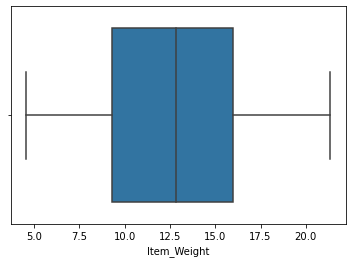

Item_Fat_Content


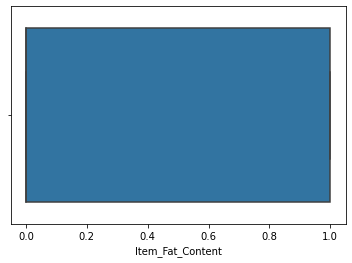

Item_Visibility


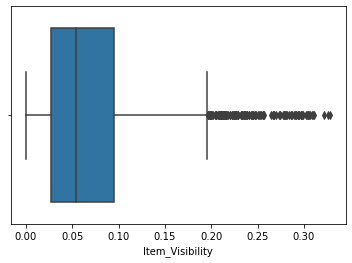

Item_MRP


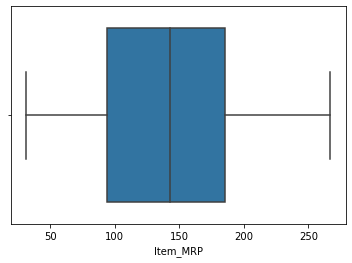

Outlet_Establishment_Year


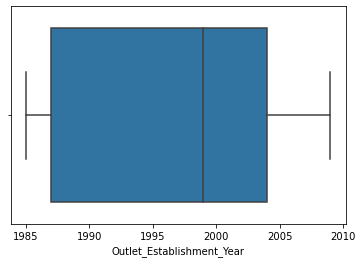

Outlet_Size


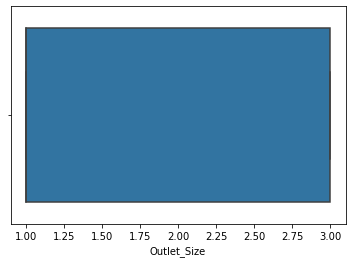

Outlet_Location_Type


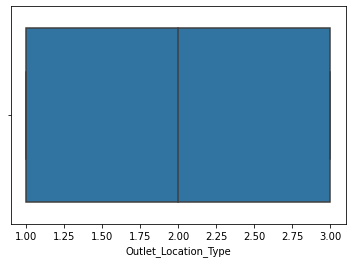

In [51]:
for col in df_train.iloc[:,0:7].columns:
    print(col)
    sns.boxplot(df_train[col])
    plt.show()

We can see that the Item_visibilty column is having outlier so we will treat it.

#### Outlier Removal

In [52]:
def boxoutlier(var):
    for x in var.iloc[:,2:3].columns :        
        Q1=var[x].quantile(0.25)
        Q3=var[x].quantile(0.75)
        IQR=Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x]=np.where(var[x].values > Upper,Upper,var[x].values)
        var.loc[:,x]=np.where(var[x].values < Lower,Lower,var[x].values)
        
    return var
df_train=boxoutlier(df_train)

Item_Weight


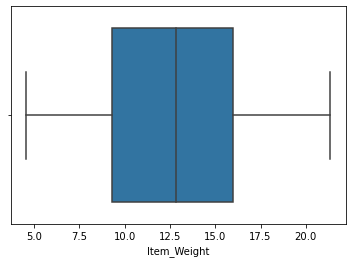

Item_Fat_Content


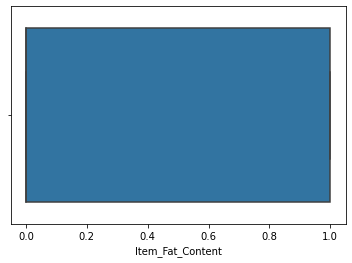

Item_Visibility


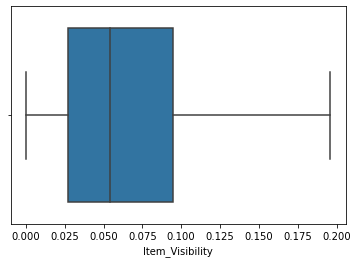

Item_MRP


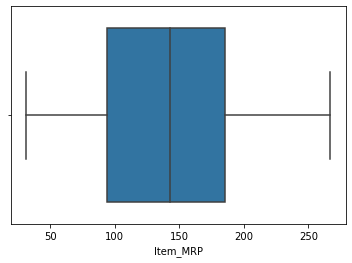

Outlet_Establishment_Year


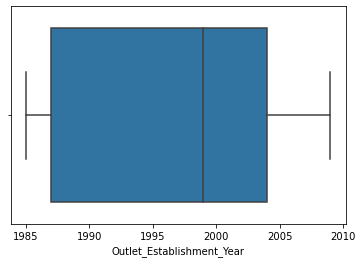

Outlet_Size


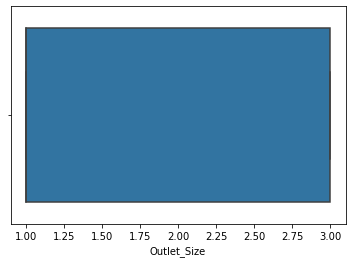

Outlet_Location_Type


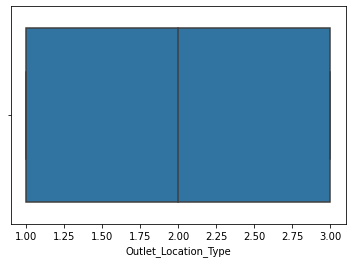

In [53]:
for col in df_train.iloc[:,0:7].columns:
    print(col)
    sns.boxplot(x=df_train[col],data=df_train)
    plt.show()

- We can see that the Outlier is Removed

In [54]:
df_train.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_2,Outlet_Type_3,Outlet_Type_4
5884,17.0,1,0.139522,266.8884,1997,3,1,5034.7796,0,0,...,0,0,0,0,0,1,0,0,0,0
6360,19.0,0,0.112893,131.0626,1998,1,3,524.6504,0,0,...,0,0,0,0,0,0,0,0,1,0
7952,10.8,0,0.000000,238.1564,2009,1,3,5243.8408,0,0,...,1,0,0,0,0,0,0,1,0,0
5562,12.5,1,0.073735,87.1198,1997,3,1,1657.1762,0,0,...,0,0,0,0,0,1,0,0,0,0
1915,15.1,0,0.059417,237.9248,1999,1,1,2133.2232,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Creating train_test_split:

In [55]:
x=df_train.drop('Item_Outlet_Sales',axis=1)
y=df_train['Item_Outlet_Sales']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [57]:
display(x_train.head(),y_train.head(),'Testing Data',x_test.head(),y_test.head())

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_2,Outlet_Type_3,Outlet_Type_4
7381,12.857645,1,0.053577,122.2072,1985,1,3,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2158,16.850000,1,0.080015,111.8544,2009,1,3,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1297,9.695000,1,0.047698,244.6144,2007,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,20.250000,0,0.036319,219.3482,2004,3,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2994,11.600000,1,0.077601,171.0106,2007,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


7381    3552.7088
2158    1677.8160
1297    2695.1584
998     5038.1086
2994    3079.9908
Name: Item_Outlet_Sales, dtype: float64

'Testing Data'

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_2,Outlet_Type_3,Outlet_Type_4
4476,20.500000,0,0.020588,89.5830,1987,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4192,12.857645,1,0.195979,88.8514,1985,3,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
355,19.250000,1,0.034700,141.7496,1997,3,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8433,11.800000,1,0.057411,149.5366,2004,3,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
385,15.250000,0,0.026605,86.2198,2004,3,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


4476    1797.6600
4192     265.6542
355     4093.3384
8433    1813.6392
385      610.5386
Name: Item_Outlet_Sales, dtype: float64

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

Text(0, 0.5, 'Predicted Values')

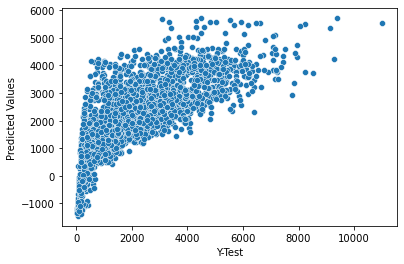

In [61]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
sns.scatterplot(y_test,predlr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predicted Values')

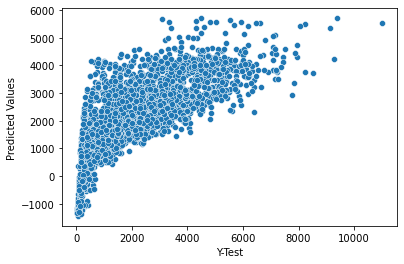

In [64]:
r=Ridge()
r.fit(x_train,y_train)
predr=r.predict(x_test)
sns.scatterplot(y_test,predr)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")

Text(0, 0.5, 'Predcited Values')

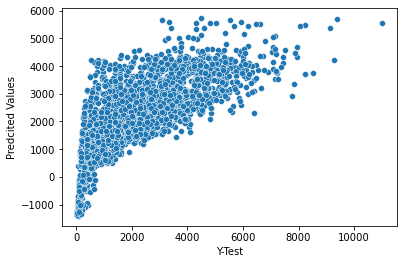

In [65]:
l=Lasso()
l.fit(x_train,y_train)
predl=l.predict(x_test)
sns.scatterplot(y_test,predl)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

Text(0, 0.5, 'Predcited Values')

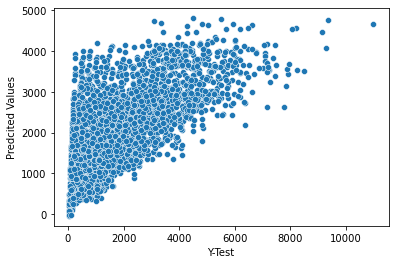

In [66]:
e=ElasticNet()
e.fit(x_train,y_train)
prede=e.predict(x_test)
sns.scatterplot(y_test,prede)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

Text(0, 0.5, 'Predcited Values')

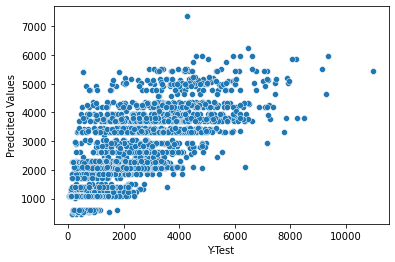

In [67]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
sns.scatterplot(y_test,predada)
plt.xlabel("Y-Test")
plt.ylabel("Predcited Values")

Text(0, 0.5, 'Predicted Values')

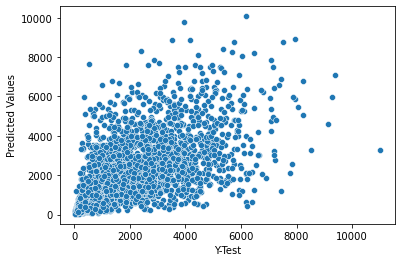

In [68]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
sns.scatterplot(y_test,preddt)
plt.xlabel("Y-Test")
plt.ylabel("Predicted Values")

#### Hyper Parameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
parameters={'max_depth':[2,5,10,50]}

In [71]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 10, 50]})

Now The Hyper Parameter Tuning is Done we will look go RMSE and MSE

#### Root Mean Squared Error

In [79]:
from sklearn import metrics
rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, predlr))
rmse_Ridge = np.sqrt(metrics.mean_squared_error(y_test, predr))
rmse_Lasso = np.sqrt(metrics.mean_squared_error(y_test, predl))
rmse_ElasticNet = np.sqrt(metrics.mean_squared_error(y_test, prede))
rmse_AdaBoostRegressor = np.sqrt(metrics.mean_squared_error(y_test, predada))
rmse_DecisionTreeRegressor = np.sqrt(metrics.mean_squared_error(y_test, preddt))
print('Root Mean Squared Error for LinearRegression is :', rmse_LR)
print('Root Mean Squared Error for Ridge Regression is :', rmse_Ridge)
print('Root Mean Squared Error for Lasso is :', rmse_Lasso)
print('Root Mean Squared Error for ElasticNet is :', rmse_ElasticNet)
print('Root Mean Square Error for AdaBoostRegressor is :',rmse_AdaBoostRegressor)
print('Root Mean Square Error for DecisionTreeRegressor is :', rmse_DecisionTreeRegressor)

Root Mean Squared Error for LinearRegression is : 1102.3103038495576
Root Mean Squared Error for Ridge Regression is : 1102.190601703072
Root Mean Squared Error for Lasso is : 1100.8610818875425
Root Mean Squared Error for ElasticNet is : 1242.2064171049396
Root Mean Square Error for AdaBoostRegressor is : 1205.863039061823
Root Mean Square Error for DecisionTreeRegressor is : 1516.706516124763


- The root mean square error for Lasso is lowest. So, the best model is LASSO.

#### R-Squred:

In [80]:
from sklearn.metrics import r2_score
print('R2 Score for LinearRegression is :', r2_score(y_test, predlr))
print('R2 Score for Ridge_Regression is :', r2_score(y_test, predr))
print('R2 Score for Lasso is :', r2_score(y_test, predl))
print('R2 score for ElasticNet is :', r2_score(y_test, prede))
print('R2 score for AdaBoostRegressor is :', r2_score(y_test, predada))
print('R2 score for DecisionTreeRegressor is :', r2_score(y_test, preddt))

R2 Score for LinearRegression is : 0.5459025049031203
R2 Score for Ridge_Regression is : 0.5460011223130237
R2 Score for Lasso is : 0.5470957359959367
R2 score for ElasticNet is : 0.42332794141633134
R2 score for AdaBoostRegressor is : 0.4565778456851681
R2 score for DecisionTreeRegressor is : 0.14030484845207025


R2 score closest to 1 is considered as good. So, the closest value to 1 is 0.547 which is of LASSO.

#### The best fit model is LASSO.

#### Model Saving:

In [81]:
import pickle
filename = 'mart_project.pkl'
pickle.dump(l, open(filename,'wb'))

#### Conclusion:

In [82]:
a = np.array(y_test)
predicted = np.array(l.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,1797.6600,1477.780886
1,265.6542,-452.044096
2,4093.3384,2274.415113
3,1813.6392,2594.174168
4,610.5386,1482.360036
...,...,...
2552,2439.4912,3972.545316
2553,731.0484,674.374133
2554,1404.8380,2279.086984
2555,1644.5260,2723.938254
